# Interactions - Lab

## Introduction

In this lab, you'll explore interactions in the Boston Housing dataset.

## Objectives

You will be able to:
- Implement interaction terms in Python using the `sklearn` and `statsmodels` packages 
- Interpret interaction variables in the context of a real-world problem 

## Build a baseline model 

You'll use a couple of built-in functions, which we imported for you below: 

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import the Boston data set using `load_boston()`. We won't bother to preprocess the data in this lab. If you still want to build a model in the end, you can do that, but this lab will just focus on finding meaningful insights in interactions and how they can improve $R^2$ values.

In [3]:
regression = LinearRegression()
boston = load_boston()

In [4]:
boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)

In [5]:
boston_target = pd.DataFrame(data=boston['target'])
boston_target.columns = ['MEDV']

In [6]:
type(boston_target)

pandas.core.frame.DataFrame

In [7]:
type(boston_features)

pandas.core.frame.DataFrame

Create a baseline model which includes all the variables in the Boston housing data set to predict the house prices. Then use 10-fold cross-validation and report the mean $R^2$ value as the baseline $R^2$.

In [14]:
X = boston_features
y = boston_target

In [10]:
from statsmodels.regression.linear_model import OLS

In [43]:
## code here
model = OLS(y, X).fit()

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [53]:
regression = LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)

baseline = np.mean(cross_val_score(regression, X, y, scoring='r2', cv=crossvalidation))
baseline

0.7190106820189475

## See how interactions improve your baseline

Next, create all possible combinations of interactions, loop over them and add them to the baseline model one by one to see how they affect the $R^2$. We'll look at the 3 interactions which have the biggest effect on our $R^2$, so print out the top 3 combinations.

You will create a `for` loop to loop through all the combinations of 2 predictors. You can use `combinations` from itertools to create a list of all the pairwise combinations. To find more info on how this is done, have a look [here](https://docs.python.org/2/library/itertools.html).

In [52]:
from itertools import combinations
combinations = list(combinations(boston.feature_names, 2))

In [58]:
combinations[1][0]

'CRIM'

In [57]:
X_interact = X.copy()
X_interact['interaction'] = X['CRIM'] * X['INDUS']

interaction = np.mean(cross_val_score(regression, X_interact, y, scoring='r2', cv=crossvalidation))
interaction

0.7180024566678991

In [61]:
X_interact = X.copy()
X_interact['interaction'] = X[combinations[1][0]] * X[combinations[1][1]]

interaction = np.mean(cross_val_score(regression, X_interact, y, scoring='r2', cv=crossvalidation))
interaction

0.7180024566678991

In [73]:
highest = []

test = [1, 3, 5, 8, 4, 7]

highest.append((max(test)))
test.remove(max(test))

print(highest)
print(test)

[8]
[1, 3, 5, 4, 7]


In [78]:
r2_values = []

for combo in combinations:
    X_interact = X.copy()
    X_interact['interaction'] = X[combo[0]] * X[combo[1]]

    r2_values.append([combo, 'word'])

print(r2_values)

[[('CRIM', 'ZN'), 'word'], [('CRIM', 'INDUS'), 'word'], [('CRIM', 'CHAS'), 'word'], [('CRIM', 'NOX'), 'word'], [('CRIM', 'RM'), 'word'], [('CRIM', 'AGE'), 'word'], [('CRIM', 'DIS'), 'word'], [('CRIM', 'RAD'), 'word'], [('CRIM', 'TAX'), 'word'], [('CRIM', 'PTRATIO'), 'word'], [('CRIM', 'B'), 'word'], [('CRIM', 'LSTAT'), 'word'], [('ZN', 'INDUS'), 'word'], [('ZN', 'CHAS'), 'word'], [('ZN', 'NOX'), 'word'], [('ZN', 'RM'), 'word'], [('ZN', 'AGE'), 'word'], [('ZN', 'DIS'), 'word'], [('ZN', 'RAD'), 'word'], [('ZN', 'TAX'), 'word'], [('ZN', 'PTRATIO'), 'word'], [('ZN', 'B'), 'word'], [('ZN', 'LSTAT'), 'word'], [('INDUS', 'CHAS'), 'word'], [('INDUS', 'NOX'), 'word'], [('INDUS', 'RM'), 'word'], [('INDUS', 'AGE'), 'word'], [('INDUS', 'DIS'), 'word'], [('INDUS', 'RAD'), 'word'], [('INDUS', 'TAX'), 'word'], [('INDUS', 'PTRATIO'), 'word'], [('INDUS', 'B'), 'word'], [('INDUS', 'LSTAT'), 'word'], [('CHAS', 'NOX'), 'word'], [('CHAS', 'RM'), 'word'], [('CHAS', 'AGE'), 'word'], [('CHAS', 'DIS'), 'word']

In [79]:
print(r2_values[0])

[('CRIM', 'ZN'), 'word']


In [81]:
r2_values[0][1]

'word'

In [83]:
r2_values = []
for combo in combinations:
    X_interact = X.copy()
    X_interact['interaction'] = X[combo[0]] * X[combo[1]]

    r2_values.append([combo, np.mean(cross_val_score(regression, X_interact, y, scoring='r2', cv=crossvalidation))])

In [85]:
r2_values[0][1]

0.7180486571803364

In [91]:
r2_val_only = []
top_three = []
x = 0
while x < 3:
    for combo, r2 in r2_values:
        r2_val_only.append(r2)
    # r2_val_only.index(max(r2_val_only))
    top_three.append(r2_values[r2_val_only.index(max(r2_val_only))])
    del r2_values[r2_val_only.index(max(r2_val_only))]
    x += 1
print(top_three)

[[('RM', 'TAX'), 0.7750525123747651], [('RM', 'PTRATIO'), 0.7633759067582868], [('RM', 'B'), 0.7385665707082879]]


In [ ]:
## code to find top 3 interactions by R^2 value here

## Look at the top 3 interactions: "RM" as a confounding factor

The top three interactions seem to involve "RM", the number of rooms as a confounding variable for all of them. Let's have a look at interaction plots for all three of them. This exercise will involve:

- Splitting the data up in 3 groups: one for houses with a few rooms, one for houses with a "medium" amount of rooms, one for a high amount of rooms 
- Create a function `build_interaction_rm()`. This function takes an argument `varname` (which can be set equal to the column name as a string) and a column `description` (which describes the variable or varname, to be included on the x-axis of the plot). The function outputs a plot that uses "RM" as a confounding factor. Each plot should have three regression lines, one for each level of "RM"  

The data has been split into high, medium, and low number of rooms for you.

In [104]:
boston_feat_tar = pd.concat([boston_features, boston_target], axis=1)

In [112]:
boston_feat_tar

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [93]:
rm = np.asarray(boston_feat_tar[['RM']]).reshape(len(boston_feat_tar[['RM']]))

In [105]:
high_rm = boston_feat_tar[rm > np.percentile(rm, 67)]
med_rm = boston_feat_tar[(rm > np.percentile(rm, 33)) & (rm <= np.percentile(rm, 67))]
low_rm = boston_feat_tar[rm <= np.percentile(rm, 33)]

Create `build_interaction_rm()`.

In [115]:
def build_interaction_rm(varname, description):
    regression_1 = LinearRegression()
    regression_2 = LinearRegression()
    regression_3 = LinearRegression()

    rm_1 = high_rm[varname].values.reshape(-1, 1)
    rm_2 = med_rm[varname].values.reshape(-1, 1)
    rm_3 = low_rm[varname].values.reshape(-1, 1)

    regression_1.fit(rm_1, high_rm['MEDV'])
    regression_2.fit(rm_2, med_rm['MEDV'])
    regression_3.fit(rm_3, low_rm['MEDV'])

    pred_1 = regression_1.predict(rm_1)
    pred_2 = regression_2.predict(rm_2)
    pred_3 = regression_3.predict(rm_3)
    plt.figure(figsize=(10,8))

    plt.scatter(rm_1, high_rm['MEDV'],  color='blue', alpha = 0.3, label = 'most rooms')
    plt.scatter(rm_2, med_rm['MEDV'],  color='red', alpha = 0.3, label = 'medium rooms')
    plt.scatter(rm_3, low_rm['MEDV'],  color='green', alpha = 0.3, label = 'least rooms')

    plt.plot(rm_1, pred_1,  color='blue', linewidth=2)
    plt.plot(rm_2, pred_2,  color='red', linewidth=2)
    plt.plot(rm_3, pred_3,  color='green', linewidth=2)

    plt.ylabel('Median Value')
    plt.xlabel(description)
    plt.legend();

Next, use `build_interaction_rm()` with the three variables that came out with the highest effect on $R^2$. 

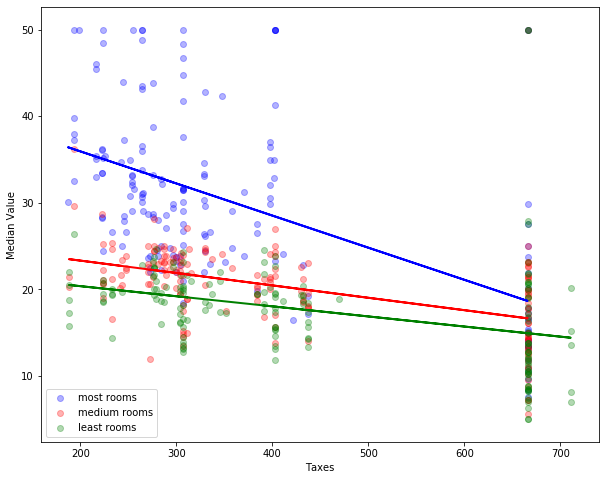

In [116]:
build_interaction_rm('TAX', 'Taxes')

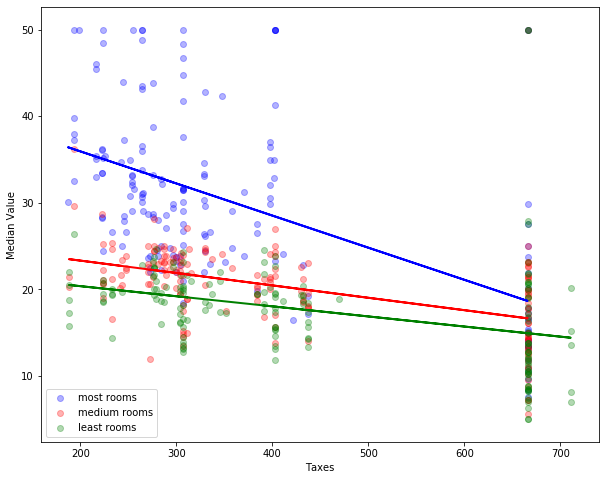

In [117]:
# first plot
build_interaction_rm('TAX', 'Taxes')

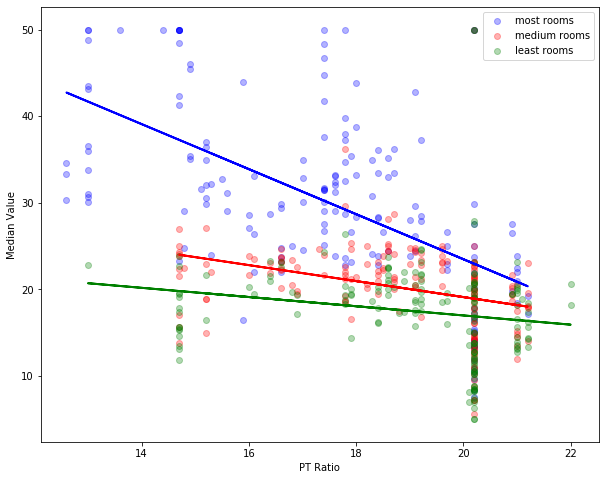

In [118]:
# second plot
build_interaction_rm('PTRATIO', 'PT Ratio')

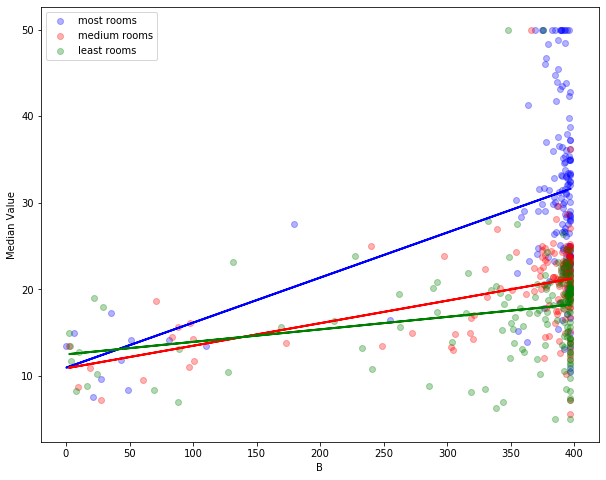

In [119]:
# third plot
build_interaction_rm('B', 'B')

## Build a final model including all three interactions at once

Use 10-fold cross-validation to build a model using all the above interactions. 

In [128]:
# code here
regression = LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=88)

X_interact = X.copy()
X_interact['RM_TAX'] = X['RM'] * X['TAX']
X_interact['RM_PTRATIO'] = X['RM'] * X['PTRATIO']
X_interact['RM_B'] = X['RM'] * X['B']

interact_rm = np.mean(cross_val_score(regression, X_interact, y, scoring='r2', cv=crossvalidation))
interact_rm

0.7851258138384731

Our $R^2$ has increased considerably! Let's have a look in `statsmodels` to see if all these interactions are significant.

In [129]:
# code here
import statsmodels.api as sm
X_interact = sm.add_constant(X_interact)
model = sm.OLS(y,X_interact)
results = model.fit()

results.summary()

/opt/conda/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     125.7
Date:                Sun, 22 Mar 2020   Prob (F-statistic):          1.30e-161
Time:                        18:29:34   Log-Likelihood:                -1427.3
No. Observations:                 506   AIC:                             2889.
Df Residuals:                     489   BIC:                             2961.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -59.2641     17.945     -3.302      0.001     -94.523     -24.005
CRIM          -0.1507      0.029     -5.167      0.000      -0.208      -0.093
ZN             0.0119      0.012      0.967      0.334      -0.012       0.036
INDUS          0.1075      0.054      1.985      0.048       0.001       0.214
CHAS           3.3329      0.753      4.425      0.000       1.853       4.813
NOX          -11.3135      3.386     -3.341      0.001     -17.966      -4.661
RM            17.3793      2.756      6.306      0.000      11.964      22.795
AGE           -0.0120      0.012     -1.033      0.302      -0.035       0.011
DIS           -0.8804      0.180     -4.881      0.000      -1.235      -0.526
RAD            0.2513      0.058      4.329      0.000       0.137       0.365
TAX            0.0657      0.014      4.766      0.000       0.039       0.093
PTRATIO        3.1699      0.890      3.560      0.000       1.420       4.920
B             -0.0478      0.024     -1.996      0.046      -0.095      -0.001
LSTAT         -0.4870      0.045    -10.838      0.000      -0.575      -0.399
RM_TAX        -0.0126      0.002     -5.854      0.000      -0.017      -0.008
RM_PTRATIO    -0.6162      0.138     -4.450      0.000      -0.888      -0.344
RM_B           0.0091      0.004      2.318      0.021       0.001       0.017
==============================================================================
Omnibus:                      270.992   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2445.721
Skew:                           2.169   Prob(JB):                         0.00
Kurtosis:                      12.858   Cond. No.                     3.47e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

What is your conclusion here?

In [ ]:
# formulate your conclusion
# There seems to be an interaction between both (RM and TAX) and (RM and PTRATIO)
# Putting these interactions into the model helps improve our R^2!

In [126]:
# code here
regression = LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=88)

X_interact_no_b = X.copy()
X_interact_no_b['RM_TAX'] = X['RM'] * X['TAX']
X_interact_no_b['RM_PTRATIO'] = X['RM'] * X['PTRATIO']

interact_rm_no_b = np.mean(cross_val_score(regression, X_interact_no_b, y, scoring='r2', cv=crossvalidation))
interact_rm_no_b

0.7847466232951598

In [127]:
import statsmodels.api as sm
X_interact_no_b = sm.add_constant(X_interact_no_b)
model = sm.OLS(y,X_interact_no_b)
results = model.fit()

results.summary()

/opt/conda/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     132.6
Date:                Sun, 22 Mar 2020   Prob (F-statistic):          1.57e-161
Time:                        18:29:15   Log-Likelihood:                -1430.1
No. Observations:                 506   AIC:                             2892.
Df Residuals:                     490   BIC:                             2960.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -82.9787     14.808     -5.604      0.000    -112.074     -53.884
CRIM          -0.1396      0.029     -4.831      0.000      -0.196      -0.083
ZN             0.0116      0.012      0.941      0.347      -0.013       0.036
INDUS          0.1124      0.054      2.068      0.039       0.006       0.219
CHAS           3.4039      0.756      4.503      0.000       1.919       4.889
NOX          -11.5527      3.399     -3.398      0.001     -18.232      -4.873
RM            21.3437      2.171      9.832      0.000      17.079      25.609
AGE           -0.0107      0.012     -0.920      0.358      -0.034       0.012
DIS           -0.8739      0.181     -4.824      0.000      -1.230      -0.518
RAD            0.2456      0.058      4.215      0.000       0.131       0.360
TAX            0.0765      0.013      5.875      0.000       0.051       0.102
PTRATIO        3.1725      0.894      3.547      0.000       1.415       4.930
B              0.0074      0.002      3.158      0.002       0.003       0.012
LSTAT         -0.5033      0.045    -11.289      0.000      -0.591      -0.416
RM_TAX        -0.0143      0.002     -7.119      0.000      -0.018      -0.010
RM_PTRATIO    -0.6183      0.139     -4.445      0.000      -0.892      -0.345
==============================================================================
Omnibus:                      265.414   Durbin-Watson:                   0.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2259.227
Skew:                           2.134   Prob(JB):                         0.00
Kurtosis:                      12.431   Cond. No.                     2.26e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Summary

You should now understand how to include interaction effects in your model! As you can see, interactions can have a strong impact on linear regression models, and they should always be considered when you are constructing your models.